In [2]:
import os
from math import ceil 
from time import time
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from architectures import *
from data import get_generators, get_dataframe

ts = datetime.fromtimestamp(time()).strftime('%Y-%m-%d-%H-%M-%S')
model, mid = architecture_07()

os.makedirs("./models/MID{mid:03d}_{ts}".format(mid=mid,ts=ts))

tensorboard = TensorBoard(log_dir="./tensorboard/MID{mid:03d}_{ts}".format(mid=mid,ts=ts))
checkpoint = ModelCheckpoint("./models/MID{mid:03d}_{ts}/weights.{{epoch:02d}}-{{val_loss:.2f}}.hdf5".format(mid=mid,ts=ts))
lrchange = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

df = get_dataframe()
train, validate, test = get_generators(
    df[df["HAS_PICTURE"] & (df["LOG_MEAN_I"] > 0)],
    batch_size=8,
    colorspace="rgb"
)

model.fit_generator(
    train["data"], 
    steps_per_epoch = train["steps"],     
    epochs=50, 
    validation_data=validate["data"], 
    validation_steps=validate["steps"],
    callbacks=[tensorboard, checkpoint, stopper, lrchange]
)

Epoch 1/50
14187/14187 [==============================] - 5313s - loss: 0.6669 - mean_squared_error: 0.7684 - val_loss: 0.4679 - val_mean_squared_error: 0.3840
Epoch 2/50
14187/14187 [==============================] - 5077s - loss: 0.5528 - mean_squared_error: 0.5058 - val_loss: 0.5439 - val_mean_squared_error: 0.5152
Epoch 3/50
14187/14187 [==============================] - 5066s - loss: 0.5094 - mean_squared_error: 0.4357 - val_loss: 0.4212 - val_mean_squared_error: 0.3202
Epoch 4/50
14187/14187 [==============================] - 5064s - loss: 0.4825 - mean_squared_error: 0.3938 - val_loss: 0.4339 - val_mean_squared_error: 0.3473
Epoch 5/50
14187/14187 [==============================] - 5063s - loss: 0.4638 - mean_squared_error: 0.3664 - val_loss: 0.4277 - val_mean_squared_error: 0.3346
Epoch 6/50
14187/14187 [==============================] - 5064s - loss: 0.4518 - mean_squared_error: 0.3484 - val_loss: 0.3861 - val_mean_squared_error: 0.2722
Epoch 7/50
14187/14187 [================

In [3]:
import numpy as np
from math import ceil
from architectures import *
from data import get_generators, get_dataframe

batch_size = 8
n_images = 10000

df = get_dataframe()

train, validate, test = get_generators(
    df[df["HAS_PICTURE"] & (df["LOG_MEAN_I"] > 0)],
    batch_size=batch_size, 
    colorspace="rgb"
)

model, mid = architecture_07()
model.load_weights("./models/MID007_2017-07-15-23-47-39/weights.17-0.36.hdf5")

y_test = np.zeros((n_images,1))
pred_test = np.zeros((n_images,1))
for i in range(0,ceil(n_images/batch_size)):
    features, labels = next(validate["data"])
    y_test[i*batch_size:(i+1)*batch_size,0] = labels
    pred_test[i*batch_size:(i+1)*batch_size,:] = model.predict(features)
    
print(np.max(pred_test))
print(np.min(pred_test))

8.43626499176
5.73464775085


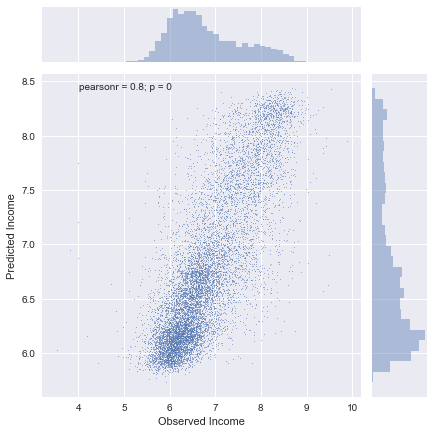

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32,32))

from scipy.stats import spearmanr, pearsonr, mode

sns.jointplot(x=y_test,y=pred_test, s=0.2).set_axis_labels("Observed Income","Predicted Income")

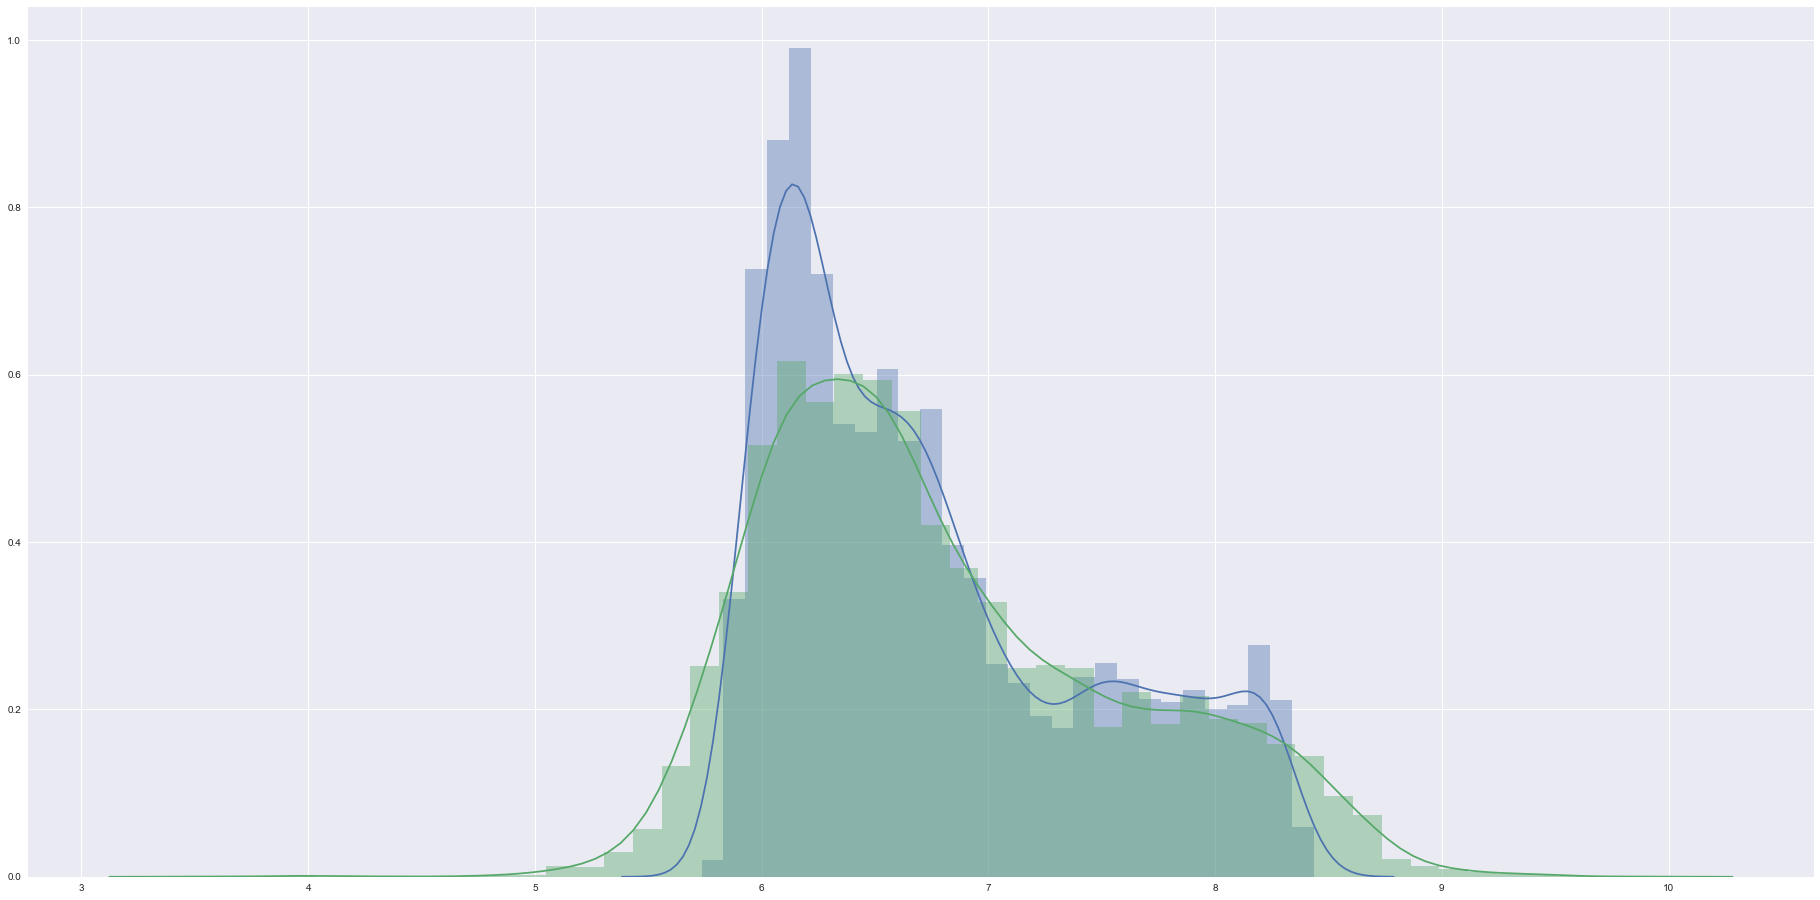

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32,16))

error = pred_test - y_test.reshape(-1,1)

sns.distplot(pred_test)
sns.distplot(y_test)

In [12]:
from mapretrieve import retrieve_address
image = retrieve_address(0,0,"Rua agnaldo manuel dos santos, 150","examples",imsize=(512,512))

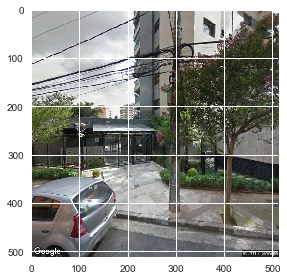

In [15]:
import skimage.io as io
image = io.imread("examples/example_001.jpg")
io.imshow(image)

In [24]:
from math import exp
image_t = ((image / 256)-0.5).reshape((1,512,512,3))
exp(model.predict(image_t))

3466.060765750231